# Multilevel architecture design - C4 Model

The C4 model is a framework for visualizing the architecture of software systems, created by Simon Brown. It provides a hierarchical set of diagrams that represent different levels of abstraction in a system, making it easier for different stakeholders to understand the architecture. The name "C4" stands for "Context, Container, Component, and Code," which are the four levels of diagrams that make up the model.

## The Four Levels of the C4 Model:
1. Context Diagram:
- Purpose: To provide a high-level overview of the system and its interactions with external entities.
- Audience: All stakeholders, including technical and non-technical people.
- Details: Shows the system under consideration, its users, and other systems it interacts with. It answers the question, "What is the system and who are its users?"

2. Container Diagram:
- Purpose: To show the high-level shape of the software architecture and how responsibilities are distributed across different containers.
- Audience: Technical people, including software architects and developers.
- Details: Depicts the major containers (applications or services) that make up the system, their responsibilities, and how they communicate. Containers can include web applications, databases, microservices, and other types of execution environments.

3. Component Diagram:
- Purpose: To decompose each container into its constituent components and show how they interact.
- Audience: Software architects and developers.
- Details: Illustrates the major logical components within a container, their responsibilities, and the interactions between them. This level focuses on the internal structure of a container.

4. Code (Class) Diagram:
- Purpose: To provide detailed design of individual components, typically using UML class diagrams.
- Audience: Developers.
- Details: Shows the implementation details of a specific component, including classes, methods, and relationships between classes. This level is optional and often used for complex components where additional detail is needed.

## Benefits of the C4 Model
Clarity and Communication: By providing different levels of abstraction, the C4 model helps in communicating the architecture to various stakeholders, from non-technical people to developers.
Scalability: The model scales from high-level overviews to detailed designs, making it suitable for large and complex systems.
Consistency: Using a standardized approach to diagramming ensures consistency and clarity across different parts of the system and different projects.
Focus on Different Aspects: Each level of the C4 model focuses on a different aspect of the system, ensuring that all important details are covered.

## Generating C4 Models with AI

**Setup**

Please rename the dot.env.sample file to .env and fill it with your secrets. Ensure all necessary environment variables are correctly populated to ensure smooth application functionality.

**Utilities**

The following blocks contain utilities for generating and display the diagrams

In [12]:
%pip install python-dotenv openai pydantic instructor plantweb
from IPython.display import clear_output
clear_output()

In [13]:
### The current notebook take inspiration from the following project: https://github.com/intellectronica/llms-beyond-chat 
import os
import io
import PIL.Image as Image
import instructor
from IPython.display import display, JSON, Markdown
from dotenv import load_dotenv
from plantweb.render import render
from typing import List
from pydantic import BaseModel, Field

load_dotenv()

def display_markdown(text):
    display(Markdown(text))

def get_env_var(var_name):
    return os.getenv(var_name)

def show_plantuml(uml_code):
    result = render(uml_code, format="png", server="http://localhost:8080/plantuml")
    f = io.BytesIO(result[0])
    return Image.open(f)

AZURE_OPENAI_ENDPOINT = get_env_var("AZURE_OPENAI_ENDPOINT")
AZURE_OPENAI_API_KEY = get_env_var("AZURE_OPENAI_API_KEY")
MODEL_NAME = "gpt-4-32k" # get_env_var("MODEL_NAME")

# Using AzureOpenAI
from openai import AzureOpenAI
aoai = AzureOpenAI(
    api_version="2024-05-01-preview",
    azure_endpoint= AZURE_OPENAI_ENDPOINT,
    api_key= AZURE_OPENAI_API_KEY,
)
client = instructor.from_openai(aoai)

def llm(response_model: BaseModel = BaseModel, system: str = None,
        user: str = None, temperature: float = 0.0, max_tokens: int = 1000):
    """
    Helper function for calling the LLM with a Pydantic BaseModel,
    a system prompt and/or a user prompt, with temperature and max_tokens.
    """
    messages = []
    if system:
        messages.append({"role": "system", "content": system})
    if user:
        messages.append({"role": "user", "content": user})
    result = client.chat.completions.create(
        model=MODEL_NAME,
        response_model=response_model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return result


### Architecture requirements

In [24]:
# Load requirements from txt file

with open("../requirements/eshop_requirements.txt") as f:
    requirements = f.read()

display_markdown(requirements)

Functional requirements:

The eshop is a web application that allows users to buy products online. 

A user should be able to access via desktop or mobile browser. When a user access the eshop, he is redirected to the landing page. 

The landing page contains a welcome message and a list of products available in the shop, the user can add products to the cart clicking on the "add to cart" button. 
When adding a product to the cart, the user can see the number of products in the cart from the top bar.

From the landing page the user can access:
- the detail page of a product when clicking on the product image or name,
- the cart when clicking on the cart icon in the top bar,
- the wishlist when clicking on the wishlist icon in the top bar,
- the account page when clicking on the account icon in the top bar, if the user is authenticated, otherwise the user is redirected to the login page.
- the search bar, where the user can search for a specific product.
- the filters, where the user can filter the products by category, price, brand, etc.
- a chat widget, available in every page, for interacting with a chatbot assistant

In the detail page of a product the user can see:
- the specifications of the product like the size, the color, the material, etc.
- the price of the product
- the availability, 
- the delivery time, 
- the warranty, 
- the reviews, 
- the rating, 
- the related products,
- the add to cart button, 
- the add to wishlist button.

In the cart page the user can see:
- the list of products in the cart,
- the total price of the products in the cart,
- the quantity of each product in the cart,
- the remove button to remove a product from the cart,
- the increase and decrease buttons to increase or decrease the quantity of a product in the cart,
- the checkout button to proceed with the payment.

When the user clicks on the checkout button, he is redirected to the checkout page. In the checkout page the user can see:
- the list of products in the cart,
- the total price of the products in the cart,
- the quantity of each product in the cart,
- the payment form to proceed with the payment.

When proceeding with the payment, the user is redirected to an external service to complete the payment. 
If the payment is successful, the user returns to the eshopp and views a confirmation message with the order number and the details of the order.
The user receives an email with the order number and the details of the order.

In the wishlist page the user can see:
- the list of products in the wishlist,
- the add to cart button to add a product from the wishlist to the cart,
- the remove button to remove a product from the wishlist.

In the account page the user can see:
- the personal information,
- the order history,
- the wishlist,
- the settings.

The user can login or register from the account page. The user can logout from the account page. 
The user can access the account page only if he is authenticated. If the user is not authenticated, he is redirected to the login page. 
In the login page the user can login with email and password.

A copilot chat bot is available in the landing page, it can provide recommendation based on user requests. If the user is logged in, it can respond to questions about orders.
The user can chat about:
- products
- orders
- delivery
- payment
- account
- settings

The user can't chat about: 
- personal information
- payment information
- security information

Non-functional requirements:
- The eshop should be responsive and work on desktop and mobile browsers.
- The eshop should be secure and protect user data.
- The eshop should be fast and provide a good user experience.
- The eshop should be reliable and available 24/7. SLA 99.99% uptime. SLI 99.99% availability.
- The eshop should be scalable and handle a large number of users and products.
- The eshop should be compliant with the GDPR and protect user privacy.
- The eshop should be accessible and provide a good user experience for users with disabilities.
- The eshop source code must be versioned and stored in a git repository.
- The eshop should be deployed in a cloud environment, with continuous integration and continuous deployment.
- The eshop should be monitored and provide metrics about the performance and the usage.


### Context Diagram

A context diagram, also known as a level 0 data flow diagram (DFD), is a high-level, graphical representation of a system that depicts the system as a single process and shows the interactions it has with external entities. These external entities could be users, systems, or organizations that interact with the system. The context diagram provides an overview of the system's boundaries and the flow of information between the system and its environment.

In [25]:
class User(BaseModel):
    '''
    A user is a person who interacts with the system
    '''
    name: str = Field(
        description="Name of the user"
    )
    role: str = Field(
        description="Role of the user"
    )

class ExternalSystem(BaseModel):
    '''
    An external system is a system that interacts with the main system
    '''
    name: str = Field(
        description="External system name"
    )
    description: str = Field(
        description="External system description"
    )

class System(BaseModel):
    '''
    The main system is the system that is being focused on
    '''
    name: str = Field(
        description="System name"
    )
    description: str = Field(
        description="System description"
    )

class ContextDiagram(BaseModel):
    '''
    A context diagram is a diagram that shows the system and its interactions with users and external systems
    '''
    description: str = Field(
        description="A description of the context diagram"
    )
    users: List[User] = Field(
        description="List of users that interact with the system"
    )
    external_systems: List[ExternalSystem] = Field(
        description="List of external systems that interact with the system"
    )
    system: System = Field(
        description="The main system"
    )

prompt = "You're a software architect who wants to provide a detailed context diagram for the current architecture"
context = f"Here the requirements: {requirements}"

context_diagram = llm(
    ContextDiagram,
    prompt,
    context,
)

# Display the context diagram object
display(JSON(context_diagram.dict()))

<IPython.core.display.JSON object>

In [26]:
# Convert context diagram object to PlantUML code

class PlantUmlContextDiagram(BaseModel):
    plantuml: str = Field(
        description="PlantUML code for the context diagram using C4-PlantUML. Use the following directive `!include  https://raw.githubusercontent.com/plantuml-stdlib/C4-PlantUML/master/C4_Container.puml`"
    )

plantuml_context_diagram = llm(
    PlantUmlContextDiagram,
    "You're a software architect who wants to provide a C4-PlantUML diagram for the current context diagram json definition",
    f"Here the context diagram definition as json: {context_diagram.model_dump_json()}",
)

display(Markdown("## Context  Diagram"))
display(Markdown(context_diagram.description))

try:
    show_plantuml(plantuml_context_diagram.plantuml)
except:
    print("Unable to print context diagram")    


## Context  Diagram

This context diagram describes the interactions between the users and the eShop system, as well as the external systems that the eShop interacts with.

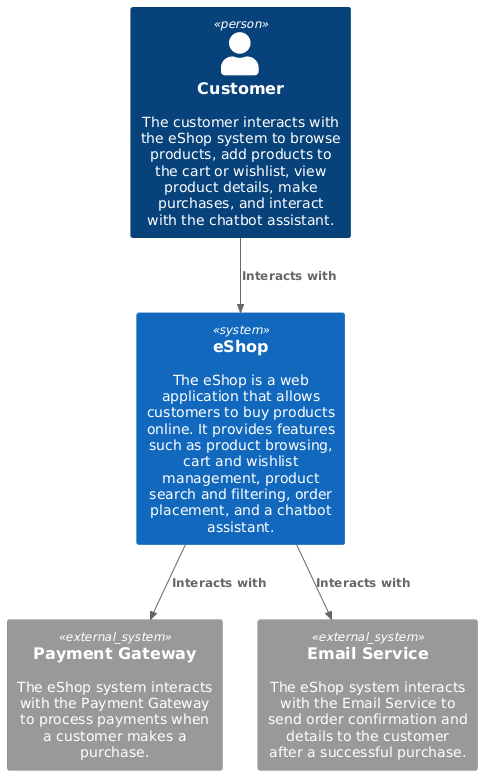

In [27]:
show_plantuml(plantuml_context_diagram.plantuml)

In [28]:
display(Markdown(plantuml_context_diagram.plantuml))

@startuml
!include https://raw.githubusercontent.com/plantuml-stdlib/C4-PlantUML/master/C4_Container.puml

Person(customer, "Customer", "The customer interacts with the eShop system to browse products, add products to the cart or wishlist, view product details, make purchases, and interact with the chatbot assistant.")

System(eshop, "eShop", "The eShop is a web application that allows customers to buy products online. It provides features such as product browsing, cart and wishlist management, product search and filtering, order placement, and a chatbot assistant.")

System_Ext(paymentGateway, "Payment Gateway", "The eShop system interacts with the Payment Gateway to process payments when a customer makes a purchase.")

System_Ext(emailService, "Email Service", "The eShop system interacts with the Email Service to send order confirmation and details to the customer after a successful purchase.")

Rel(customer, eshop, "Interacts with")
Rel(eshop, paymentGateway, "Interacts with")
Rel(eshop, emailService, "Interacts with")

@enduml

### Container Diagram

A container diagram is a high-level architectural diagram that visually represents the structure of a software system by illustrating its primary containers and their relationships. It is one of the key diagrams in the C4 model, which is a set of hierarchical diagrams designed to describe software architecture at different levels of detail. The container diagram sits at level 1 in this model, following the context diagram level 0.

In [29]:
# Container diagram

class Container(BaseModel):
    name: str = Field(
        description="Container name"
    )
    description: str = Field(
        description="Container description"
    )
    technology: str = Field(
        description="Container technology"
    )

class ContainerDiagram(BaseModel):
    description: str = Field(
        description="Container Diagram textual description"
    )
    system: System = Field(
        description="The main system"
    )
    containers: List[Container] = Field(
        description="List of containers in the system"
    )
    users: List[User] = Field(
        description="List of users of the system"
    )
    external_systems: List[ExternalSystem] = Field(
        description="List of external systems that interact with the system"
    )

container_diagram_prompt = "You're a software architect who wants to provide a detailed container diagram for the current architecture"
container_diagram_context = f"Here the requirements: {requirements} - Here the context diagram: {context_diagram.model_dump_json()}"

container_diagram = llm(
    ContainerDiagram,
    container_diagram_prompt,
    container_diagram_context,
)

# Display the container diagram object
display(JSON(container_diagram.dict()))


<IPython.core.display.JSON object>

In [30]:
class PlantUmlContainerDiagram(BaseModel):
    plantuml: str = Field(
        description="PlantUML code for the container diagram using C4-PlantUML. Use the folloing directive `!include  https://raw.githubusercontent.com/plantuml-stdlib/C4-PlantUML/master/C4_Container.puml`"
    )

plantuml_container_diagram = llm(
    PlantUmlContainerDiagram,
    "You're a software architect who wants to provide a C4-PlantUML diagram for the current container diagram json definition",
    f"Here the container diagram definition as json: {container_diagram.model_dump_json()}",
)

display(Markdown("## Container Diagram"))
display(Markdown(container_diagram.description))

try:
    show_plantuml(plantuml_container_diagram.plantuml)
except:
    print("Unable to print container diagram")    


## Container Diagram

This container diagram describes the main containers within the eShop system, their responsibilities, and the technology they use.

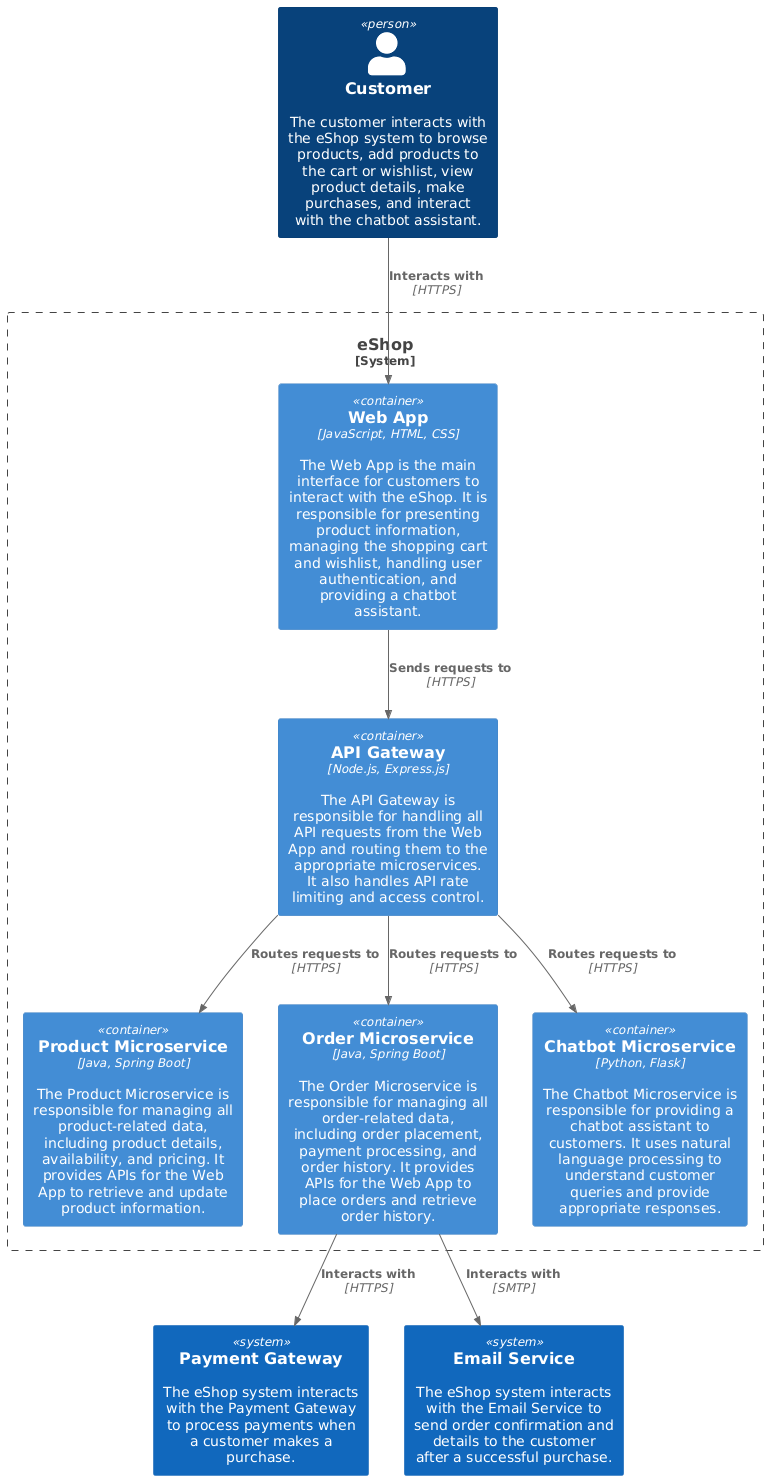

In [34]:
show_plantuml(plantuml_container_diagram.plantuml)

### Component diagram

A component diagram is a type of diagram used in software engineering to describe the organization and relationships of components within a system. It sits at level 2, offering a more detailed view of the system’s architecture than the container diagram.

In [31]:
# Component diagram

class Component(BaseModel):
    '''
    Component model class, defining the component structure composing a container
    '''
    name: str = Field(
        description="Component name"
    )
    description: str = Field(
        description="Component description"
    )
    technology: str = Field(
        description="Component technology"
    )

class ComponentDiagram(BaseModel):
    description: str = Field(
        description="Component Diagram textual description"
    )
    system: System = Field(
        description="The main system"
    )
    components: List[Component] = Field(
        description="List of components in each container"
    )
    users: List[User] = Field(
        description="List of users of the system"
    )
    external_systems: List[ExternalSystem] = Field(
        description="List of external systems that interact with the system"
    )

component_diagram_prompt = "You're a software architect who wants to provide a detailed component diagram for the current architecture"
component_diagram_context = f"Here the requirements: {requirements} - Here the context diagram: {context_diagram.model_dump_json()} - Here the container diagram: {container_diagram.model_dump_json()}"
                           
component_diagram = llm(
    ComponentDiagram,
    component_diagram_prompt,
    component_diagram_context,
)

# Display the component diagram object
display(JSON(component_diagram.dict()))

<IPython.core.display.JSON object>

In [32]:
class PlantUmlComponentDiagram(BaseModel):
    plantuml: str = Field(
        description="PlantUML code for the component diagram using C4-PlantUML. Use the folloing directive `!include  https://raw.githubusercontent.com/plantuml-stdlib/C4-PlantUML/master/C4_Container.puml`)"
    )

plantuml_component_diagram = llm(
    PlantUmlComponentDiagram,
    "You're a software architect who wants to provide a C4-PlantUML diagram for the current component diagram json definition",
    f"Here the component diagram definition as json: {component_diagram.model_dump_json()}",
)

display(Markdown("## Component Diagram"))
display(Markdown(component_diagram.description))

try:
    show_plantuml(plantuml_component_diagram.plantuml)
except:
    print("Unable to print component diagram")    


## Component Diagram

This component diagram describes the main components within each container of the eShop system, their responsibilities, and the technology they use.

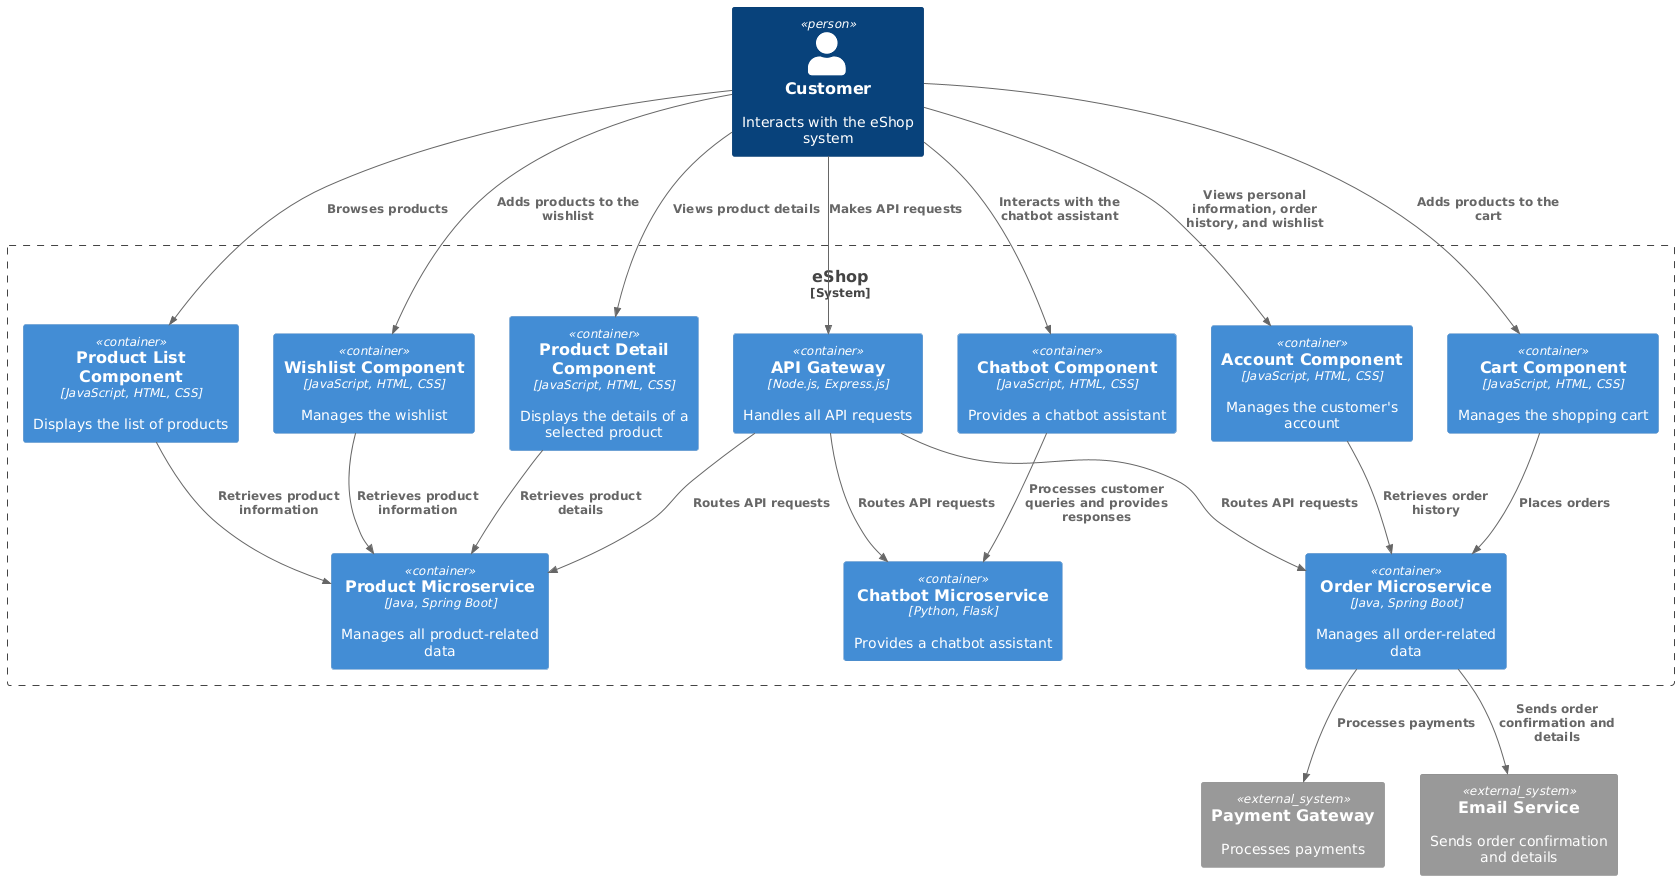

In [35]:
show_plantuml(plantuml_component_diagram.plantuml)

### Code Diagram

⚠️ Do not use code diagram ⚠️